In [24]:
import pandas as pd
import numpy as np
from mod_my_utils.read_write_data import get_price_csv


### Get stock data

In [3]:
folder_path = 'data/'
stock_name = 'AAPL'
index_col = 'Date'

In [4]:
stock_data = get_price_csv(folder_name=folder_path,symbol=stock_name, index_col=index_col)

stock name:  AAPL


In [5]:
stock_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2007-12-03,181.86,184.14,177.70,178.8600,34338200.0,0.0,1.0,23.371545,23.664556,22.836927,22.986003,240367400.0
2007-12-04,177.15,180.90,176.99,179.8100,27635700.0,0.0,1.0,22.766244,23.248171,22.745682,23.108091,193449900.0
2007-12-05,182.89,186.00,182.41,185.5000,31871500.0,0.0,1.0,23.503914,23.903592,23.442227,23.839335,223100500.0
2007-12-06,186.19,190.10,186.12,189.9528,32136100.0,0.0,1.0,23.928010,24.430500,23.919014,24.411582,224952700.0
2007-12-07,190.54,194.99,188.04,194.3000,38073800.0,0.0,1.0,24.487046,25.058933,24.165761,24.970258,266516600.0


In [6]:
data = stock_data[["Adj. Close"]].copy()
data.columns = ["price"]
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


<AxesSubplot:xlabel='Date'>

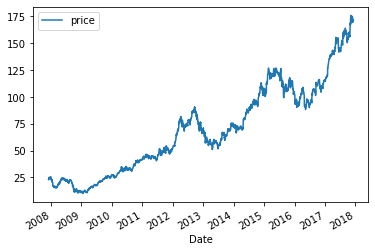

In [7]:
data.plot()

<img src="img/macd1.png" alt="drawing" style="width:600px;"/>

<img src="img/macd2.png" alt="drawing" style="width:600px;"/>

In [8]:
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


### Get Parameter

In [9]:
short_window = 20
long_window = 50
signal_window = 12

### MACD

In [10]:
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


In [11]:
data["SMA"] = data['price'].rolling(window = short_window, center=False).mean()

In [12]:
data["LMA"] = data['price'].rolling(window = long_window, center=False).mean()

In [13]:
data["MACD"] = data['SMA'] - data['LMA']

In [ ]:
macd = sma - lma > 0
macd > o
sma - lma > 0
sma > lma

In [14]:
data.head()

,price,SMA,LMA,MACD
Date,,,,
2007-12-03,22.986003,NaN,NaN,NaN
2007-12-04,23.108091,NaN,NaN,NaN
2007-12-05,23.839335,NaN,NaN,NaN
2007-12-06,24.411582,NaN,NaN,NaN
2007-12-07,24.970258,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

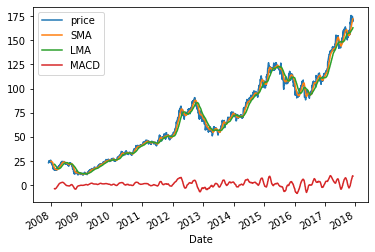

In [15]:
data.plot()

### Moving Average Crossover
- The Moving average crossover technique is an extremely well-known simplistic momentum strategy.
- This is considered the "Hello world" example for quantitative trading
- Create two separate simple moving average filters, with varying lookback periods of a particular time series.
- Signals to purchase the asset at the time when the shorter lookback moving average exceeds the longer lookback moving average
- If the later time longer average subsequently exceeds the shorter average, the asset is sold back
- The strategy workds well when a time series enters a perod of strong trend and then slowly reverses the trend

<AxesSubplot:xlabel='Date'>

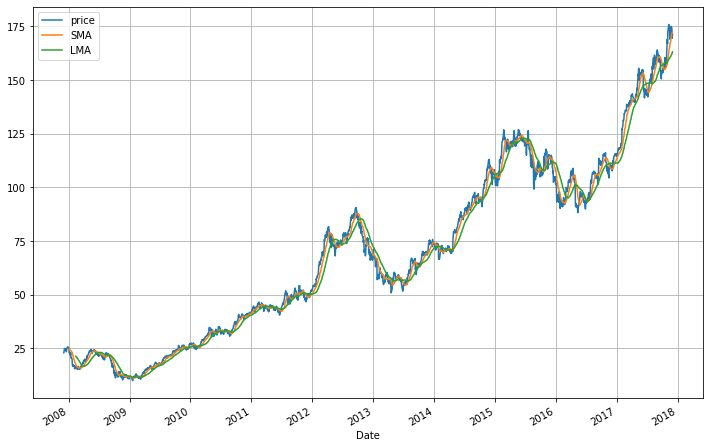

In [17]:
data[['price', 'SMA', 'LMA']].plot(grid=True, figsize=(12, 8))

<AxesSubplot:xlabel='Date'>

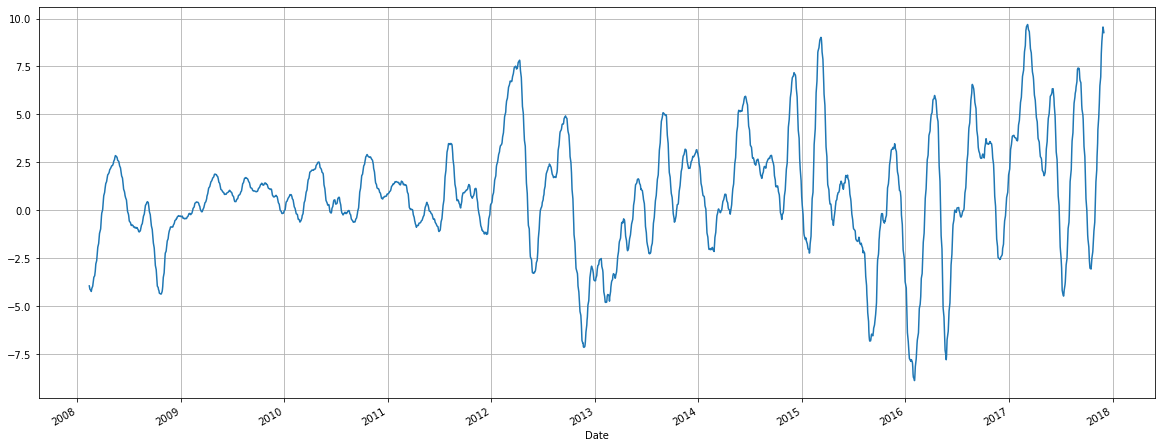

In [18]:
data['MACD'].plot(grid=True, figsize=(20, 8))

In [20]:
data.head(40)

,price,SMA,LMA,MACD,short_long
Date,,,,,
2007-12-03,22.986003,NaN,NaN,NaN,0.0
2007-12-04,23.108091,NaN,NaN,NaN,0.0
2007-12-05,23.839335,NaN,NaN,NaN,0.0
2007-12-06,24.411582,NaN,NaN,NaN,0.0
2007-12-07,24.970258,NaN,NaN,NaN,0.0
2007-12-10,24.958692,NaN,NaN,NaN,0.0
2007-12-11,24.230069,NaN,NaN,NaN,0.0
2007-12-12,24.528170,NaN,NaN,NaN,0.0
2007-12-13,24.652829,NaN,NaN,NaN,0.0


In [19]:
data['short_long'] = 0.0

<AxesSubplot:xlabel='Date'>

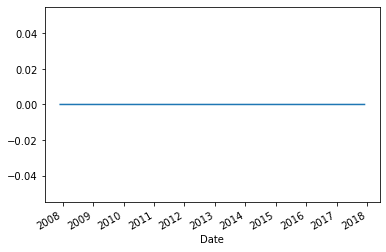

In [21]:
data['short_long'].plot()

In [22]:
data.head()

,price,SMA,LMA,MACD,short_long
Date,,,,,
2007-12-03,22.986003,NaN,NaN,NaN,0.0
2007-12-04,23.108091,NaN,NaN,NaN,0.0
2007-12-05,23.839335,NaN,NaN,NaN,0.0
2007-12-06,24.411582,NaN,NaN,NaN,0.0
2007-12-07,24.970258,NaN,NaN,NaN,0.0


In [32]:
# data['short_long_signal'].plot()

In [25]:
data['short_long'][long_window:] = np.where(data['SMA'][long_window:] 
                                            > data['LMA'][long_window:], 1.0, 0.0) 

<AxesSubplot:xlabel='Date'>

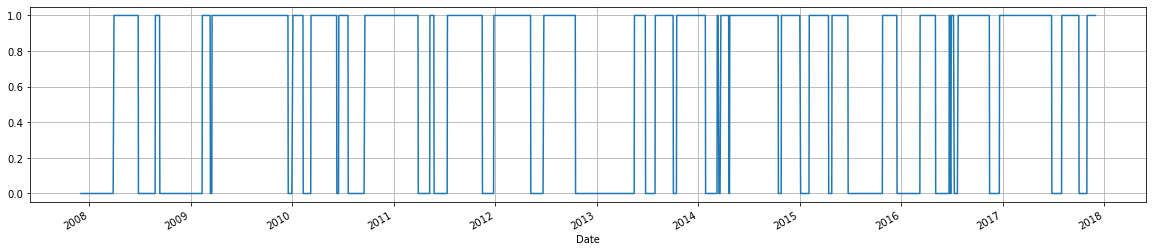

In [26]:
data['short_long'].plot(grid=True, figsize=(20, 4))

<AxesSubplot:xlabel='Date'>

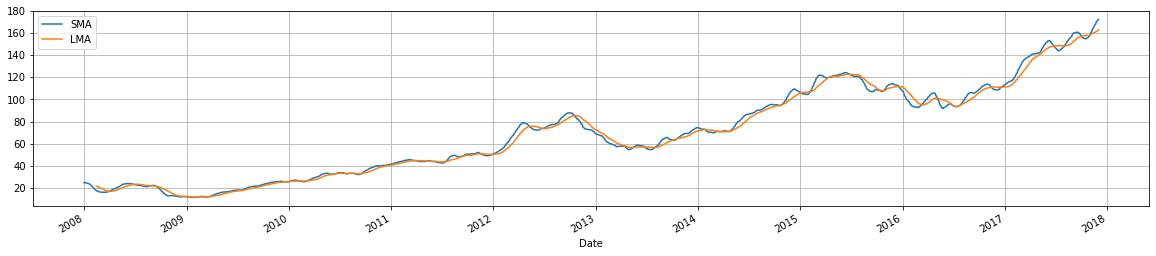

In [27]:
data[['SMA', 'LMA']].plot(grid=True, figsize=(20, 4))

In [35]:
00000 111111 000000 11111111

diff

00000 100000  -1 00000 1 00000000



SyntaxError: invalid syntax (Temp/ipykernel_8440/2856099022.py, line 1)

In [37]:
1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
diff
buy_sell_signal = [1 0 0 0 0 0 -1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 -1 0 0 0 0]


SyntaxError: invalid syntax (Temp/ipykernel_8440/2900052649.py, line 1)

## Generating trading orders

In [29]:
data['short_long_signal'] = data['short_long'].diff()

In [30]:
data.head()

,price,SMA,LMA,MACD,short_long,short_long_signal
Date,,,,,,
2007-12-03,22.986003,NaN,NaN,NaN,0.0,NaN
2007-12-04,23.108091,NaN,NaN,NaN,0.0,0.0
2007-12-05,23.839335,NaN,NaN,NaN,0.0,0.0
2007-12-06,24.411582,NaN,NaN,NaN,0.0,0.0
2007-12-07,24.970258,NaN,NaN,NaN,0.0,0.0


<AxesSubplot:xlabel='Date'>

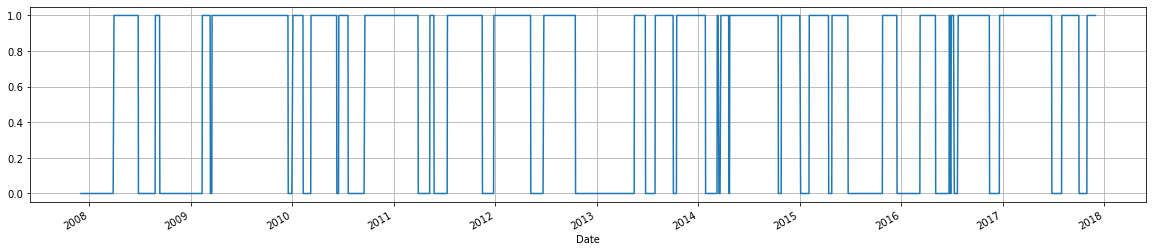

In [31]:
data['short_long'].plot(grid=True, figsize=(20, 4))

<AxesSubplot:xlabel='Date'>

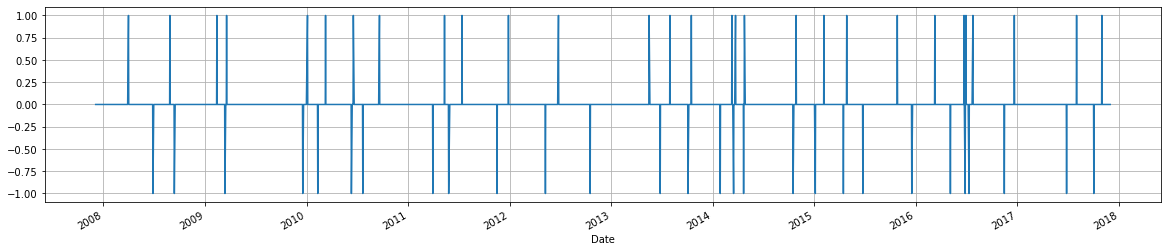

In [32]:
data['short_long_signal'].plot(grid=True, figsize=(20, 4))

### macd signal line

In [33]:
data.head()

,price,SMA,LMA,MACD,short_long,short_long_signal
Date,,,,,,
2007-12-03,22.986003,NaN,NaN,NaN,0.0,NaN
2007-12-04,23.108091,NaN,NaN,NaN,0.0,0.0
2007-12-05,23.839335,NaN,NaN,NaN,0.0,0.0
2007-12-06,24.411582,NaN,NaN,NaN,0.0,0.0
2007-12-07,24.970258,NaN,NaN,NaN,0.0,0.0


In [34]:
data['signal_line'] = data['MACD'].rolling(window = signal_window).mean()

In [35]:
data.head()

,price,SMA,LMA,MACD,short_long,short_long_signal,signal_line
Date,,,,,,,
2007-12-03,22.986003,NaN,NaN,NaN,0.0,NaN,NaN
2007-12-04,23.108091,NaN,NaN,NaN,0.0,0.0,NaN
2007-12-05,23.839335,NaN,NaN,NaN,0.0,0.0,NaN
2007-12-06,24.411582,NaN,NaN,NaN,0.0,0.0,NaN
2007-12-07,24.970258,NaN,NaN,NaN,0.0,0.0,NaN


In [36]:
data.tail(20)

,price,SMA,LMA,MACD,short_long,short_long_signal,signal_line
Date,,,,,,,
2017-11-02,168.11,159.48625,158.596916,0.889334,1.0,0.0,-1.301235
2017-11-03,172.50,160.34625,158.861516,1.484734,1.0,0.0,-0.938078
2017-11-06,174.25,161.26675,159.149316,2.117434,1.0,0.0,-0.540369
2017-11-07,174.81,162.21225,159.416116,2.796134,1.0,0.0,-0.102409
2017-11-09,175.88,163.17875,159.675516,3.503234,1.0,0.0,0.368875
2017-11-10,174.67,164.11225,159.901916,4.210334,1.0,0.0,0.878001
2017-11-13,173.97,164.96125,160.101316,4.859934,1.0,0.0,1.423539
2017-11-14,171.34,165.53425,160.247116,5.287134,1.0,0.0,1.981569
2017-11-15,169.08,165.96475,160.387116,5.577634,1.0,0.0,2.535232


In [37]:
data['macd_signal'] = 0.0

In [47]:
data.head()

,price,SMA,LMA,MACD,short_long,short_long_signal,signal_line,macd_signal
Date,,,,,,,,
2007-12-03,22.986003,NaN,NaN,NaN,0.0,NaN,NaN,0.0
2007-12-04,23.108091,NaN,NaN,NaN,0.0,0.0,NaN,0.0
2007-12-05,23.839335,NaN,NaN,NaN,0.0,0.0,NaN,0.0
2007-12-06,24.411582,NaN,NaN,NaN,0.0,0.0,NaN,0.0
2007-12-07,24.970258,NaN,NaN,NaN,0.0,0.0,NaN,0.0


In [38]:
data['macd_signal'][long_window:] = np.where(data['MACD'][long_window:] 
                                            > data['signal_line'][long_window:], 1.0, 0.0) 

In [39]:
data.head()

,price,SMA,LMA,MACD,short_long,short_long_signal,signal_line,macd_signal
Date,,,,,,,,
2007-12-03,22.986003,NaN,NaN,NaN,0.0,NaN,NaN,0.0
2007-12-04,23.108091,NaN,NaN,NaN,0.0,0.0,NaN,0.0
2007-12-05,23.839335,NaN,NaN,NaN,0.0,0.0,NaN,0.0
2007-12-06,24.411582,NaN,NaN,NaN,0.0,0.0,NaN,0.0
2007-12-07,24.970258,NaN,NaN,NaN,0.0,0.0,NaN,0.0


<AxesSubplot:xlabel='Date'>

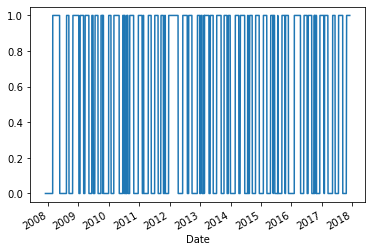

In [40]:
data['macd_signal'].plot()

In [41]:
data['macd_signalline_signal'] = data['macd_signal'].diff()

<AxesSubplot:xlabel='Date'>

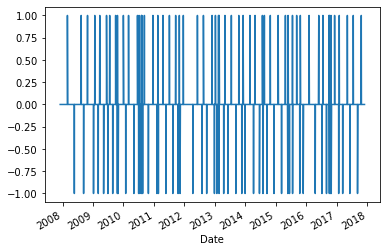

In [42]:
data['macd_signalline_signal'].plot()

<AxesSubplot:xlabel='Date'>

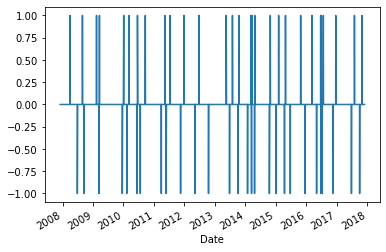

In [43]:
data['short_long_signal'].plot()